# Linear Regression

## Linear Regression 1 variable

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def initializeParameter(n):
    w = np.zeros((n,1), dtype=float)
    b = np.zeros((1,1), dtype=float)
    return w, b

In [3]:
def computeCost(X, y, w, b):
    m, _= y.shape
    y_hat = np.zeros(y.shape)
    y_hat = np.dot(X, w) + b
    cost = (1/(2*m)) * np.sum(np.power(y_hat - y, 2))
    return cost, y_hat

In [4]:
def gradientDescent(X, y, w, b, learning_rate, iterations):
    m, _ = y.shape
    y_hat = np.zeros(y.shape)
    costHistory = np.zeros((iterations), dtype=float)
    
    for i in range(0, iterations):
        cost, y_hat = computeCost(X, y, w, b)
        dw = (2/m) * np.sum((y_hat - y) * X)
        db = (2/m) * np.sum((y_hat - y))
        w = w - learning_rate * dw
        b = b - learning_rate * db
        costHistory[i] = cost
        
    return w, b, costHistory

C:\Users\ekoru\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


Best parameter : w =  [[1.19303364]] b =  [[-3.89578088]]


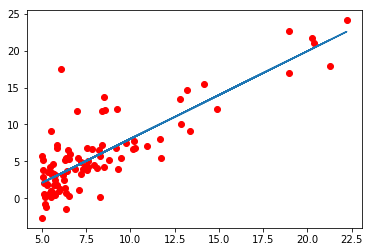

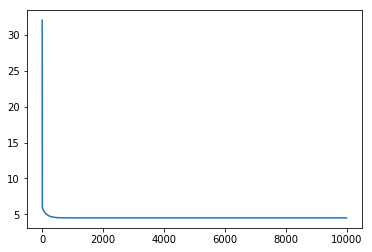

In [5]:
# Load dataset
path = os.getcwd()
data = pd.read_csv(path + "/Dataset/ex1data1.txt", sep=",", header=None)
data.columns = ["x", "y"]
dataset = data.as_matrix(columns=None)

# Get number of dataset
m, column = dataset.shape
n = column - 1

# Get input x
X = np.zeros((m,1), dtype=float)
X[:,0] = dataset[:,0]

# Get input y
y = np.zeros((m,1), dtype=float)
y[:,0] = dataset[:,1]

# Plot data using matplotlib
fig = plt.figure()
plt.plot(X, y, 'ro')

w, b = initializeParameter(n)
cost, _ = computeCost(X, y, w, b)

iterations = 10000
learning_rate = 0.01

w, b, costHistory = gradientDescent(X, y, w, b, learning_rate, iterations)

print("Best parameter : w = ", w, "b = ", b)

_, y_hat = computeCost(X, y, w, b)

plt.plot(X, y_hat)

fig2 = plt.figure()
plt.plot(np.arange(iterations), costHistory)
